In [1]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install memory_profiler > /dev/null 2>&1

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END


In [2]:
#@title Utils

# Función para ordenar por montículos (heapsort) de manera iterativa
def iterative_heapsort(arr):
    n = len(arr)
    # Construir un max-heap
    for i in range(n // 2 - 1, -1, -1):
        iterative_heapify(arr, n, i)
    # Extraer elementos del heap
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Intercambiar
        iterative_heapify(arr, i, 0)

def iterative_heapify(arr, n, i):
    while True:
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2
        if l < n and arr[i] < arr[l]:
            largest = l
        if r < n and arr[largest] < arr[r]:
            largest = r
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            i = largest
        else:
            break

<ipython-input-3-4d7fd363912e>:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


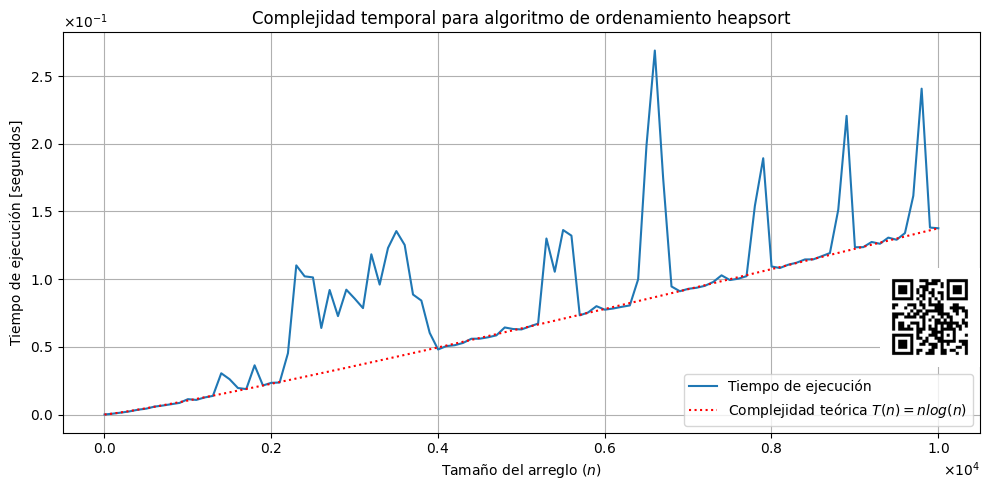

In [3]:
# Lista de tamaños de lista para probar
tamanos_lista = np.arange(1, 10010, 100)

# Inicializar arrays para los tamaños de memoria
tiempos_heapsort = np.zeros(len(tamanos_lista))

average = 10

# Medir el tiempo de heapsort 5 veces para cada tamaño de lista
for i, n in enumerate(tamanos_lista):
    tiempos_heapsort_n = np.zeros(average)
    for j in range(average):
        lista = np.random.randint(0, 1000, size=n)
        start_time = time.time()
        iterative_heapsort(lista)
        end_time = time.time()
        tiempos_heapsort_n[j] = end_time - start_time
    tiempos_heapsort[i] = np.mean(tiempos_heapsort_n)

# Generar el código QR
qr_data = "https://bit.ly/3WFjfTy"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Gráfica: Tiempo de heapsort de elementos en un arreglo
ax1.plot(tamanos_lista, tiempos_heapsort, label='Tiempo de ejecución')

# Agregar la línea T(n) = O(n log n)
n_log_n = tamanos_lista * np.log(tamanos_lista)
# Escalar n_log_n para ajustarse a la escala de tiempos_heapsort
n_log_n_scaled = n_log_n * (tiempos_heapsort[-1] / n_log_n[-1])
ax1.plot(tamanos_lista, n_log_n_scaled, label='Complejidad teórica $T(n)=nlog(n)$', linestyle='dotted', color='red')

ax1.set_xlabel('Tamaño del arreglo ($n$)')
ax1.set_ylabel('Tiempo de ejecución [segundos]')
ax1.set_title('Complejidad temporal para algoritmo de ordenamiento heapsort')
ax1.legend(loc='lower right')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.885, 0.23, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('complejidad_temporal_loglineal.png', dpi=300)